In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from matplotlib import offsetbox
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection  import train_test_split

In [2]:
import utils_blood_cells as utils

In [4]:
# Récupère un échantillon de 4000 images de cellules normales : 500  par type
utils.change_path_root('../images_mendeley/dataset_redim/')
df_data_cells, data =  utils.get_mendeley_cells(size=4000, stratify_category = True)

In [7]:
#Cible : le type de cellule
target = df_data_cells['category'] 
target.value_counts()

neutrophil      500
eosinophil      500
ig              500
platelet        500
erythroblast    500
monocyte        500
basophil        500
lymphocyte      500
Name: category, dtype: int64

In [8]:
#Réduction de dimension
sel = SelectPercentile(percentile = 90)
sel.fit(data, target)
data_red = sel.transform(data)

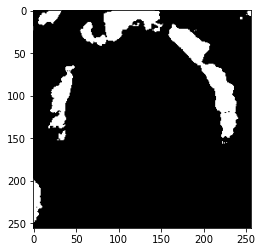

In [9]:
plt.imshow(sel.get_support().reshape(256,256), cmap = 'gray_r');

>Réduction de dimension par percentile n'est pas intéressant : risque de perte d'information sur la cellule tout en gardant l'extérieur

In [10]:
def plot_components(data, model,target, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray_r', prefit = False):
    ax = ax or plt.gca()
    
    if not prefit :
        proj = model.fit_transform(data)
    else:
        proj = data
#     ax.plot(proj[:, 0], proj[:, 1], '.b')
    sns.scatterplot(proj[:, 0], proj[:, 1], hue = target, ax=ax)
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # On ne montre pas le points trop proches
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap, zoom=0.2),
                                      proj[i])
            ax.add_artist(imagebox)

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,method='barnes_hut')

data_tsne = tsne.fit_transform(data)

C:\Users\LAURE\anaconda3\envs\Projet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

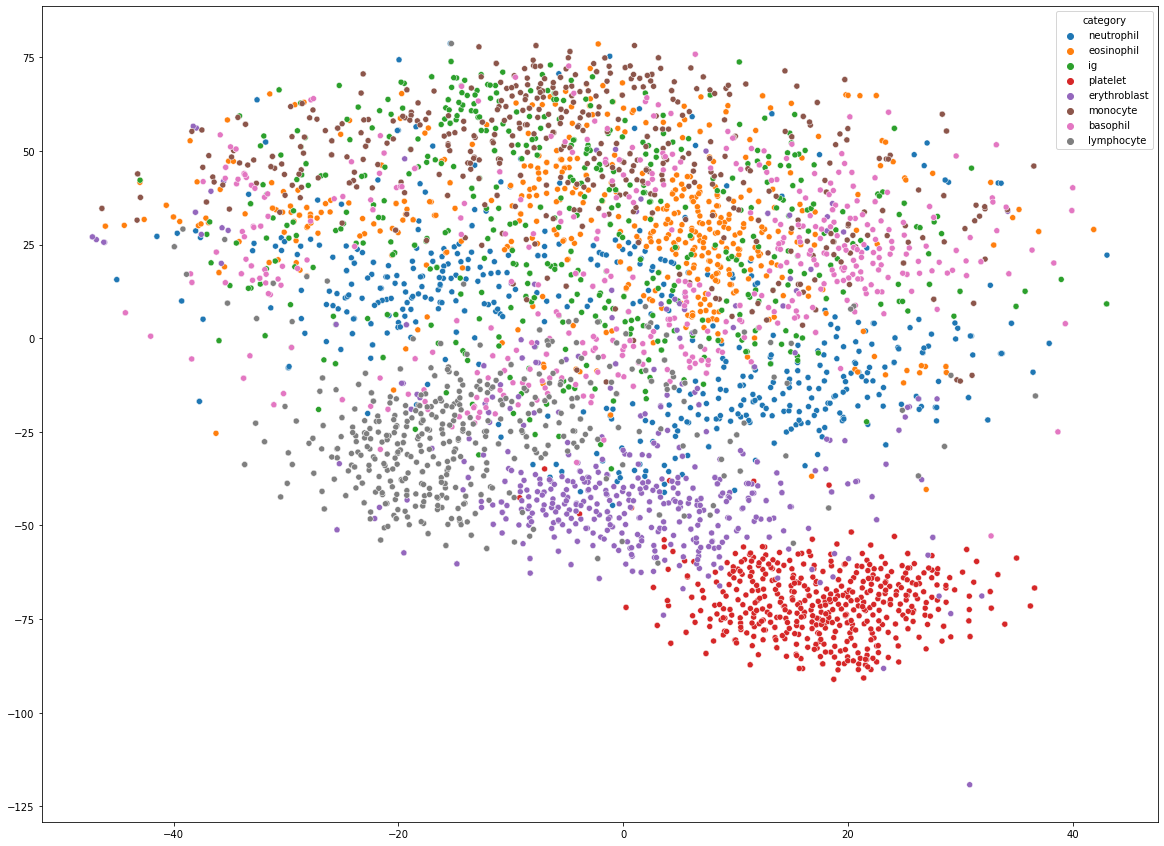

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 15))
sns.scatterplot(data_tsne[:, 0], data_tsne[:, 1], hue = target, ax=ax)

C:\Users\LAURE\anaconda3\envs\Projet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


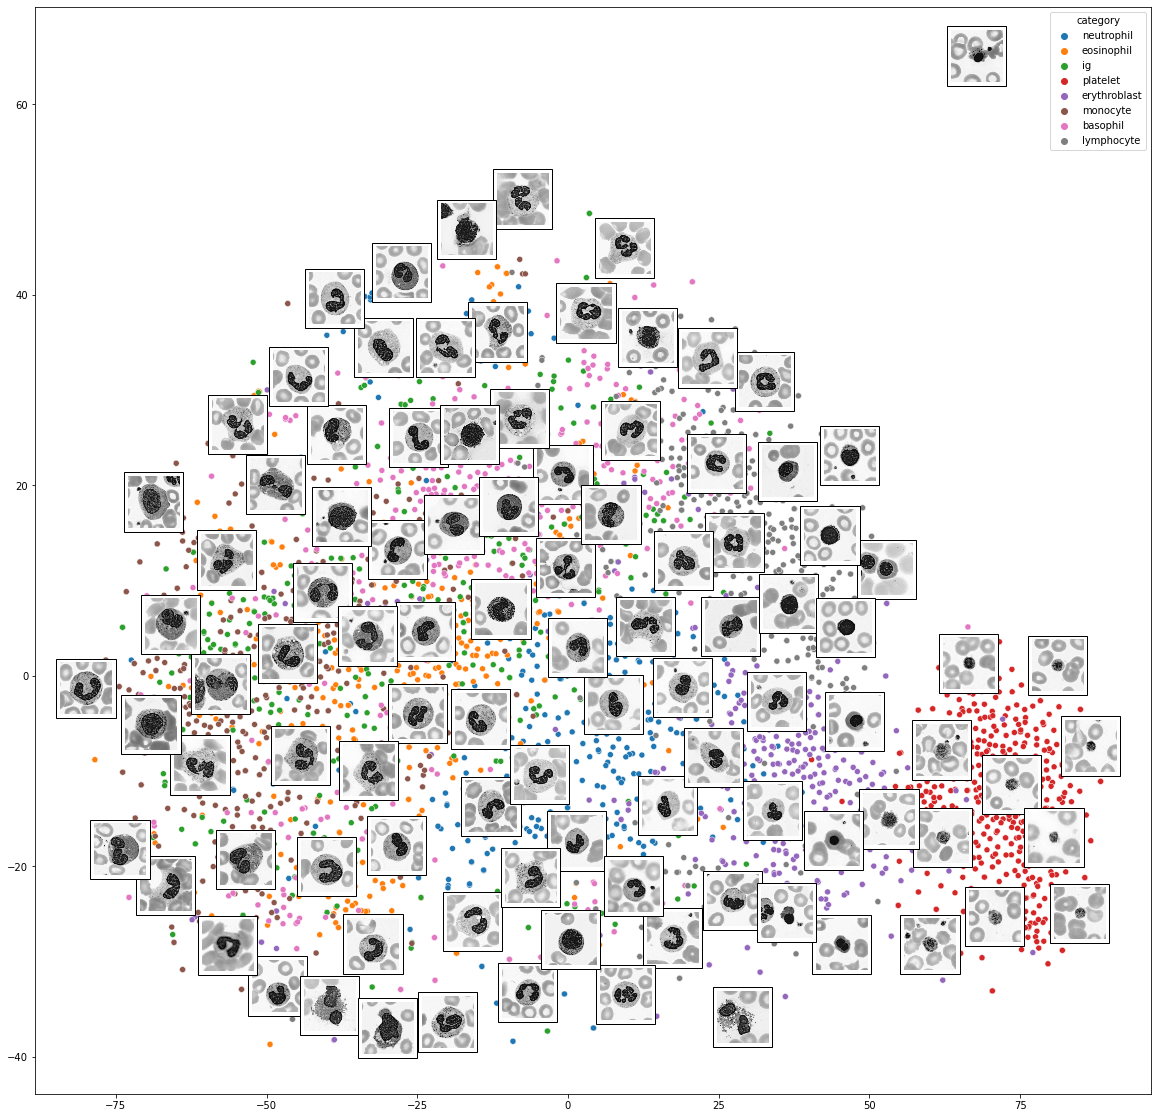

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))

plot_components(data,
                tsne,
                target,
                images=data.reshape((-1, 256, 256)),
                cmap = 'gray',
                thumb_frac = .05)